In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
'''
Interest rate data
https://www.bankofengland.co.uk/boeapps/database/Bank-Rate.asp

'''

#Load the interest data
df_rateHistory = pd.read_csv('https://raw.githubusercontent.com/DatativeIntelligence/python/main/Bank%20Rate%20history%20and%20data%20Bank%20of%20England%20Database.csv')

#Add a new Year column
df_rateHistory['Year'] = pd.to_datetime(df_rateHistory['Date Changed']).dt.year.astype(str)

#Get average year rate changes
df_yearRate = df_rateHistory.groupby(['Year'])['Rate'].mean().reset_index(name='Interest_Rate')

print(df_yearRate.iloc[::-1])

    Year  Interest_Rate
39  2022       1.050000
38  2021       0.250000
37  2020       0.175000
36  2018       0.750000
35  2017       0.500000
34  2016       0.250000
33  2009       1.000000
32  2008       3.950000
31  2007       5.500000
30  2006       4.875000
29  2005       4.500000
28  2004       4.375000
27  2003       3.666667
26  2001       4.964286
25  2000       5.875000
24  1999       5.416667
23  1998       6.937500
22  1997       6.750000
21  1996       5.925000
20  1995       6.505000
19  1994       5.630000
18  1993       5.630000
17  1992       8.380000
16  1991      11.880000
15  1990      13.880000
14  1989      14.020000
13  1988       9.463333
12  1987       9.380000
11  1986      10.963333
10  1985      12.522857
9   1984      10.023846
8   1983       9.928889
7   1982      11.887500
6   1981      14.161111
5   1980      15.000000
4   1979      14.000000
3   1978       9.041667
2   1977       8.960526
1   1976      11.678571
0   1975      10.846154


In [3]:
#Load the house price data
df_housePrice = pd.read_csv('https://raw.githubusercontent.com/DatativeIntelligence/python/main/ukhpi-property-type-pac-united-kingdom-from-2000-01-01-to-2022-06-01.csv')

#Add a new Year column
df_housePrice['Year'] = pd.to_datetime(df_housePrice['Period']).dt.year.astype(str)

#Get annual price changes
df_yearPrice = df_housePrice.groupby(['Year'])['Percentage change (yearly) All property types'].mean().reset_index(name='Price_Change')

print(df_yearPrice.iloc[::-1])


    Year  Price_Change
22  2022     10.852000
21  2021      9.227500
20  2020      2.855833
19  2019      0.992500
18  2018      3.151667
17  2017      4.569167
16  2016      7.017500
15  2015      5.961667
14  2014      8.012500
13  2013      2.565000
12  2012      0.395000
11  2011     -1.445833
10  2010      5.795000
9   2009     -8.550000
8   2008     -4.342500
7   2007      9.926667
6   2006      7.833333
5   2005      7.395000
4   2004     11.830833
3   2003     16.099167
2   2002     16.021667
1   2001      8.200000
0   2000     14.995000


    Year  Interest_Rate  Price_Change
0   2000       5.875000     14.995000
1   2001       4.964286      8.200000
2   2002       4.964286     16.021667
3   2003       3.666667     16.099167
4   2004       4.375000     11.830833
5   2005       4.500000      7.395000
6   2006       4.875000      7.833333
7   2007       5.500000      9.926667
8   2008       3.950000     -4.342500
9   2009       1.000000     -8.550000
10  2010       1.000000      5.795000
11  2011       1.000000     -1.445833
12  2012       1.000000      0.395000
13  2013       1.000000      2.565000
14  2014       1.000000      8.012500
15  2015       1.000000      5.961667
16  2016       0.250000      7.017500
17  2017       0.500000      4.569167
18  2018       0.750000      3.151667
19  2019       0.750000      0.992500
20  2020       0.175000      2.855833
21  2021       0.250000      9.227500
22  2022       1.050000     10.852000


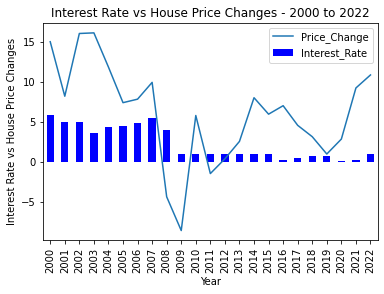

In [5]:
#Merge two dataframes by Year
merged_df = pd.merge(df_yearRate, df_yearPrice, 
                     left_on = 'Year', 
                     right_on = 'Year', 
                     how='right')

#Fill the NaN interest rate with previous Year rate
filled_df = merged_df.fillna(method='ffill')
print(filled_df)
#filled_df.plot(x ='Year', y='Rate', kind = 'line')	

ax = plt.gca()
filled_df.plot(kind='line',x='Year',y='Price_Change',ax=ax)
filled_df.plot(kind='bar',x='Year',y='Interest_Rate', color='blue', ax=ax)

#add axis labels and a title
plt.ylabel('Interest Rate vs House Price Changes', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.title('Interest Rate vs House Price Changes - 2000 to 2022', fontsize=12)

plt.show()